# Classification models spot-check on Telecom users dataset to predict churn of a user.

## *With all features*

In this notebook we perform an Classification models spot-check on Telecom users dataset (obtained from kaggle: https://www.kaggle.com/radmirzosimov/telecom-users-dataset) to predict churn of a user.

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## 0. Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

print("Libraries imported!!")

Libraries imported!!


----------------------------------------------------------------------------------------
## 1. Load and read the dataset

Here, we read the dataset and we find the shape of it as well as the colum names.

In [2]:
df = pd.read_csv('telecom_users_train.csv')
#conversions
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# drop first column
df = df.drop(['Unnamed: 0','customerID','TotalCharges'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,1,Yes,No,28,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.70,No
1,Female,0,No,No,6,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,47.95,Yes
2,Male,0,No,No,55,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.80,Yes
3,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),59.80,No
4,Female,0,No,No,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,No
4784,Male,0,Yes,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,No
4785,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),63.95,No
4786,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,No


## 2. Evaluate models without pre-processing
- Label encoding categorical attributes

In [3]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0,28,1,2,2,1,1,1,1,1,1,0,0,3,25.70,No
1,0,0,0,0,6,0,1,0,0,0,2,0,2,2,0,1,2,47.95,Yes
2,1,0,0,0,55,1,2,1,0,0,0,0,2,2,0,1,2,96.80,Yes
3,0,0,1,1,54,1,2,0,0,2,2,0,0,0,2,1,0,59.80,No
4,0,0,0,0,29,1,0,2,1,1,1,1,1,1,0,0,1,19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,No
4784,1,0,1,1,66,1,0,2,1,1,1,1,1,1,1,1,2,20.35,No
4785,1,0,0,0,5,1,0,0,0,0,2,2,2,0,0,1,1,63.95,No
4786,0,0,1,1,43,1,0,0,2,0,2,0,2,2,2,0,0,75.20,No


In [4]:
target = 'Churn'
X_train = data_train.loc[:,data_train.columns != target].values
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 18), (4788,))

In [5]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [6]:
#spot-check the models
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
models['AB'] = AdaBoostClassifier()
models['GBM'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier()
models['ET'] = ExtraTreesClassifier()

#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: nan (+-nan)
LDA: 0.798031 (+-0.018153)
KNN: 0.774225 (+-0.014153)
CART: 0.721587 (+-0.028924)
NB: 0.755011 (+-0.021290)
SVM: 0.786962 (+-0.017026)
AB: 0.796568 (+-0.020329)
GBM: 0.796569 (+-0.014649)
RF: 0.785714 (+-0.015045)
ET: 0.768590 (+-0.018012)


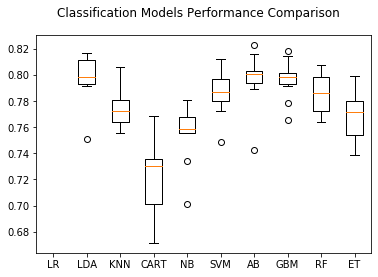

In [7]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It seems that the best models are LDA, AB and GBM, with mean accuracy values of 0.7980, 0.7965 and 0.7963.

## 3. Evaluate models without pre-processing
- One-Hot encoding categorical attributes

In [9]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
num_features = ['tenure','MonthlyCharges']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

target = 'Churn'
X_train = data_train.loc[:,data_train.columns != target].values
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 18), (4788,))

In [17]:
encoded = OneHotEncoder().fit_transform(data_train[cat_features]).toarray()
X_train = np.column_stack((encoded, data_train[num_features].values))
X_train.shape

(4788, 45)

In [18]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [19]:
#spot-check the models
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
models['AB'] = AdaBoostClassifier()
models['GBM'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier()
models['ET'] = ExtraTreesClassifier()

#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: nan (+-nan)
LDA: 0.798032 (+-0.016543)
KNN: 0.769210 (+-0.018813)
CART: 0.724311 (+-0.021417)
NB: 0.697776 (+-0.026559)
SVM: 0.787589 (+-0.015683)
AB: 0.798447 (+-0.019429)
GBM: 0.798869 (+-0.016096)
RF: 0.780077 (+-0.018945)
ET: 0.755432 (+-0.016839)


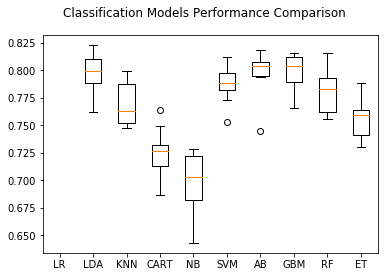

In [20]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It seems that the best models are AB, GBM and LDA with mean accuracy values of 0.7984, 0.7988 and 0.7980. We can see that the model accuracy has improved a little bit.

## 4. Evaluate the models Standardizing the data
- Label encoding categorical attributes

In [22]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0,28,1,2,2,1,1,1,1,1,1,0,0,3,25.70,No
1,0,0,0,0,6,0,1,0,0,0,2,0,2,2,0,1,2,47.95,Yes
2,1,0,0,0,55,1,2,1,0,0,0,0,2,2,0,1,2,96.80,Yes
3,0,0,1,1,54,1,2,0,0,2,2,0,0,0,2,1,0,59.80,No
4,0,0,0,0,29,1,0,2,1,1,1,1,1,1,0,0,1,19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,No
4784,1,0,1,1,66,1,0,2,1,1,1,1,1,1,1,1,2,20.35,No
4785,1,0,0,0,5,1,0,0,0,0,2,2,2,0,0,1,1,63.95,No
4786,0,0,1,1,43,1,0,0,2,0,2,0,2,2,2,0,0,75.20,No


In [23]:
target = 'Churn'
X_train = data_train.loc[:,data_train.columns != target].values
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 18), (4788,))

In [5]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [26]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.797195 (+-0.015800)
ScaledLDA: 0.798031 (+-0.018153)
ScaledKNN: 0.746651 (+-0.027347)
ScaledCART: 0.726811 (+-0.026997)
ScaledNB: 0.755011 (+-0.021290)
ScaledSVM: 0.789258 (+-0.021791)
ScaledAB: 0.796568 (+-0.020329)
ScaledGBM: 0.796778 (+-0.014735)
ScaledRF: 0.786551 (+-0.016571)
ScaledET: 0.769845 (+-0.019181)


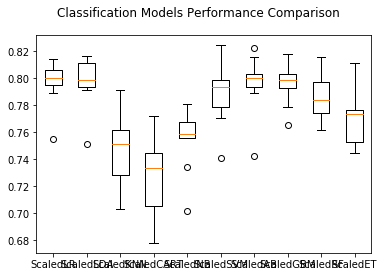

In [27]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Standardizing the data does not give better results.